# Lab 3

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('flats.csv')
df


,Ссылка,Город,Цена в месяц,Оплата ЖКХ,Срок аренды,Условия проживания,Комиссия,Предоплата,Залог,Метро,...,Санузел,Вид из окон,Количество лифтов,Год постройки,Подъезды,Ремонт,Отопление,Аварийность,Газоснабжение,Мусоропровод
0,https://www.cian.ru/rent/flat/294428443/,Москва,55000,включена (без счётчиков),от года,можно с детьми и животными,50%,1 месяц,55000,Рязанский проспект,...,1 совмещенный,Во двор,"1 пассажирский, 1 грузовой",2021.0,8.0,Евроремонт,Центральное,Нет,NaN,Да
1,https://www.cian.ru/rent/flat/294390966/,Москва,55000,включена (без счётчиков),от года,NaN,50%,1 месяц,55000,Планерная,...,1 совмещенный,Во двор,1 пассажирский,1967.0,8.0,Евроремонт,Центральное,Нет,Центральное,Да
2,https://www.cian.ru/rent/flat/294069308/,Москва,55000,включена (без счётчиков),от года,можно с детьми и животными,70%,1 месяц,55000,Филатов Луг,...,2 раздельных,На улицу и двор,"2 пассажирских, 2 грузовых",2022.0,5.0,Евроремонт,Центральное,Нет,NaN,NaN
3,https://www.cian.ru/rent/flat/294381458/,Москва,55000,включена (без счётчиков),от года,можно с детьми и животными,50%,1 месяц,55000,Беломорская,...,1 совмещенный,Во двор,"1 пассажирский, 1 грузовой",1963.0,1.0,Евроремонт,Центральное,Нет,Центральное,Да
4,https://www.cian.ru/rent/flat/253514447/,Москва,55000,включена (без счётчиков),от года,можно с детьми,50%,1 месяц,55000,Щукинская,...,1 раздельный,Во двор,"3 пассажирских, 1 грузовой",2004.0,5.0,Косметический,Центральное,Нет,NaN,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,https://spb.cian.ru/rent/flat/294441081/,Санкт-Петербург,45000,4 000 ₽ (без счётчиков),от года,NaN,60%,1 месяц,45000,Старая Деревня,...,1 совмещенный,NaN,"1 пассажирский, 1 грузовой",2020.0,4.0,Евроремонт,Центральное,Нет,NaN,Нет
2947,https://spb.cian.ru/rent/flat/294473733/,Санкт-Петербург,33000,3 500 ₽ (без счётчиков),от года,можно с детьми,80%,1 месяц,33000,Проспект Славы,...,1 раздельный,NaN,1 пассажирский,2016.0,3.0,NaN,Центральное,Нет,NaN,NaN
2948,https://spb.cian.ru/rent/flat/294442131/,Санкт-Петербург,50000,7 000 ₽ (без счётчиков),от года,NaN,50%,1 месяц,50000,Приморская,...,1 совмещенный,На улицу,1 грузовой,NaN,NaN,Дизайнерский,NaN,NaN,NaN,NaN
2949,https://spb.cian.ru/rent/flat/294458218/,Санкт-Петербург,20000,не включена,от года,можно с детьми и животными,100%,1 месяц,20000,NaN,...,NaN,NaN,NaN,2022.0,12.0,Евроремонт,Индивидуальный тепловой пункт,Нет,NaN,NaN


### Переименуем на английский названия и удалим некоторые колонки

In [60]:
df = df[df['Тип жилья'].notnull()]
df = df[df['Газоснабжение'].notnull()]
df['month_cost'] = df['Цена в месяц']

df['rent_time'] = df['Срок аренды']
df['living_conditions'] = df['Условия проживания']
df['commission'] = df['Комиссия']
df['deposit'] = df['Залог'] #
df['metro'] = df['Метро']
df['washing_machine'] = df['Стиральная машина']
df['tv'] = df['Телевизор']
df['internet'] = df['Интернет']
df['square'] = df['Общая площадь']
df['parking_space'] = df['Парковка']
df['found_year'] = df['Год постройки']
df['repair'] = df['Ремонт']

df = df.loc[:, ~df.columns.isin(['Город', 'Ссылка', 'Город', 'Цена в месяц', 'Оплата ЖКХ', 'Жилая площадь', 'Площадь кухни', 'Высота потолков', 'Тип дома', 'Тип перекрытий', 'Вид из окон', 'Санузел', 'Вид из окон', 'Количество лифтов', 'Подъезды', 'Отопление', 'Аварийность', 'Газоснабжение', 'Мебель на кухне', 'Срок аренды', 'Условия проживания', 'Комиссия', 'Предоплата', 'Залог', 'Метро', 'Холодильник', 'Стиральная машина', 'Мебель в комнатах', 'Телевизор', 'Интернет', 'Тип жилья', 'Общая площадь', 'Парковка', 'Год постройки', 'Ремонт', 'Мусоропровод'])]
df.head()


,month_cost,rent_time,living_conditions,commission,deposit,metro,washing_machine,tv,internet,square,parking_space,found_year,repair
1636,42000,несколько месяцев,можно с детьми,50%,42000,Черная речка,False,True,True,20,NaN,1961.0,Дизайнерский
1671,27000,несколько месяцев,NaN,NaN,27000,Маяковская,True,True,True,15,NaN,1902.0,Косметический
1764,45000,несколько месяцев,NaN,NaN,45000,Маяковская,True,True,True,30,NaN,1902.0,Дизайнерский
1834,30000,от года,NaN,NaN,30000,Фрунзенская,True,True,True,20,Открытая,1900.0,Евроремонт
1847,30000,несколько месяцев,можно с детьми,NaN,2000,Чернышевская,True,False,False,22,Наземная,1889.0,Косметический


### Проверим, что значения везде уникальны (иначе это просто лишний параметр)

In [61]:
print("month_cost", df['month_cost'].unique())
print("rent_time", df['rent_time'].unique())
print("living_conditions", df['living_conditions'].unique())
print("commission", df['commission'].unique())
print("deposit", df["deposit"].unique())
print("metro", df["metro"].unique())
print("washing_machine", df["washing_machine"].unique())
print("tv", df["tv"].unique())
print("internet", df["internet"].unique())
print("square", df["square"].unique())
print("parking_space", df["parking_space"].unique())
print("found_year", df["found_year"].unique())
print("repair", df["repair"].unique())
print(len(df['metro'].unique()))
print(list(range(9)))

metroList = list(df['metro'].unique())

metroToNumber = {}
for i in range(len(metroList)):
    metroToNumber[metroList[i]] = i

month_cost [42000 27000 45000 30000 24500 35000 55000 50000]
rent_time ['несколько месяцев' 'от года']
living_conditions ['можно с детьми' nan 'можно с детьми и животными']
commission ['50%' nan '40%']
deposit [42000 27000 45000 30000  2000  8000     0 55000]
metro ['Черная речка' 'Маяковская' 'Фрунзенская' 'Чернышевская'
 'Площадь Восстания' 'Достоевская' 'Московская' 'Адмиралтейская' 'Лесная']
washing_machine [False  True]
tv [ True False]
internet [ True False]
square ['20' '15' '30' '22' '10' '42' '23' '14,8']
parking_space [nan 'Открытая' 'Наземная']
found_year [1961. 1902. 1900. 1889. 1877. 1891. 1905. 1956.]
repair ['Дизайнерский' 'Косметический' 'Евроремонт']
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [62]:
df['month_cost'] = df['month_cost'].map(lambda x: int(x))
df['rent_time'] = df['rent_time'].map(lambda x: 0 if x == 'несколько месяцев' else 1)
df['living_conditions'] = df['living_conditions'].map(lambda x: 2 if x == 'можно с детьми и животными' else 1 if x == 'можно с детьми' else 0)
df['commission'] = df['commission'].map(lambda x: 0.50 if x == '50%' else 0.4 if x == '40%' else 0.0)
df['deposit'] = df['deposit'].map(lambda x: int(x))
df['metro'] = df['metro'].map(lambda x: metroToNumber[x])
df['washing_machine'] = df['washing_machine'].map(lambda x: 1 if x else 0)
df['tv'] = df['tv'].map(lambda x: 1 if x else 0)
df['internet'] = df['internet'].map(lambda x: 1 if x else 0)
df['square'] = df['square'].map(lambda x: float(str(x).replace(',','.')))
df['parking_space'] = df['parking_space'].map(lambda x: 2 if x == 'Наземная' else 1 if x == 'Открытая' else 0)
df['found_year'] = df['found_year'].map(lambda x: int(x))
df['repair'] = df['repair'].map(lambda x: 2 if x == 'Дизайнерский' else 1 if x == 'Евроремонт' else 0)

In [63]:
df.head()

,month_cost,rent_time,living_conditions,commission,deposit,metro,washing_machine,tv,internet,square,parking_space,found_year,repair
1636,42000,0,1,0.5,42000,0,0,1,1,20.0,0,1961,2
1671,27000,0,0,0.0,27000,1,1,1,1,15.0,0,1902,0
1764,45000,0,0,0.0,45000,1,1,1,1,30.0,0,1902,2
1834,30000,1,0,0.0,30000,2,1,1,1,20.0,1,1900,1
1847,30000,0,1,0.0,2000,3,1,0,0,22.0,2,1889,0


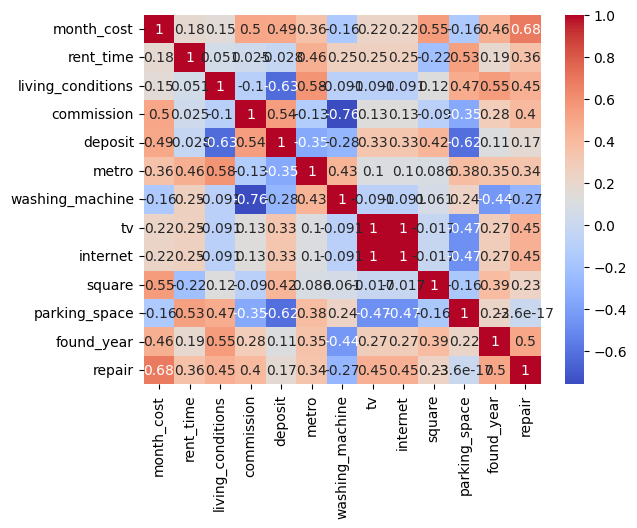

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pd.DataFrame.corr(df), annot=True, cmap='coolwarm')
plt.show()

In [78]:
ndf = (df - df.min()) / (df.max() - df.min())

print(list(df.columns))
features = [
 'rent_time',
 'living_conditions',
 'commission',
 'deposit',
 'metro',
 'washing_machine',
 'tv',
 'internet',
 'square',
 'parking_space',
 'found_year',
 'repair' 
]

X = ndf[features]
Y = np.log(df['month_cost'])
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, train_size=0.8)

for df in [X_train, X_test, Y_train, Y_test]:
 df.reset_index(drop=True, inplace=True)
 
X_train

['month_cost', 'rent_time', 'living_conditions', 'commission', 'deposit', 'metro', 'washing_machine', 'tv', 'internet', 'square', 'parking_space', 'found_year', 'repair']


,rent_time,living_conditions,commission,deposit,metro,washing_machine,tv,internet,square,parking_space,found_year,repair
0,1.0,1.0,0.0,0.000000,1.000,1.0,1.0,1.0,0.15000,1.0,0.940476,1.0
1,0.0,0.0,0.0,0.145455,0.500,1.0,1.0,1.0,0.00000,0.0,0.000000,0.0
2,1.0,0.0,0.0,0.545455,0.250,1.0,1.0,1.0,0.31250,0.5,0.273810,0.5
3,0.0,0.5,0.0,0.036364,0.375,1.0,0.0,0.0,0.37500,1.0,0.142857,0.0
4,1.0,0.0,0.0,0.545455,0.250,1.0,1.0,1.0,0.31250,0.5,0.273810,0.5
5,1.0,1.0,0.0,0.000000,1.000,1.0,1.0,1.0,0.40625,1.0,0.940476,1.0
6,0.0,0.0,0.0,0.490909,0.125,1.0,1.0,1.0,0.15625,0.0,0.297619,0.0
7,0.0,0.0,0.0,0.818182,0.125,1.0,1.0,1.0,0.62500,0.0,0.297619,1.0
8,0.0,0.5,0.0,0.818182,0.750,1.0,1.0,1.0,1.00000,0.0,1.000000,0.5


In [80]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape

def learn_reg(alpha): 
    reg = SGDRegressor(alpha=alpha, max_iter=10000, tol=1e-5)
    reg.fit(X_train, Y_train)
    return reg, mape(np.exp(Y_test), np.exp(reg.predict(X_test)))

_, err = min([learn_reg(alpha) for alpha in [1e-1, 1e-2, 1e-3, 1e-4, 1e-6, 0]], key=lambda v: v[1])
print(f"test error = {err}")

test error = 0.43709424219237397


In [83]:
from scipy.optimize import least_squares 

class LinReg:
    def __init__(self, X: pd.DataFrame, y):
        def f(coffs, x):
            return coffs[0] + np.dot(coffs[1:], x)

        def loss(coffs):
            return y - X.apply(lambda row: f(coffs, row.tolist()), axis=1)

        self.f = f
        self.coffs = least_squares(loss, np.ones(X.shape[1] + 1)).x

    def predict(self, x):
        return x.apply(lambda row: self.f(self.coffs, row.tolist()), axis=1)
    
    

In [84]:
model = LinReg(X_train, Y_train)
print(f"mape = {mape(np.exp(Y_test), np.exp(model.predict(X_test)))}")
np.exp(Y_test) - np.exp(model.predict(X_test))

mape = 0.6824655014792427


0    -9424.986208
1    41036.109186
2    44058.353102
dtype: float64